# Import data

In [1]:
import numpy as np
import pandas as pd
from load_data import LoadData
from sklearn.utils import shuffle

In [2]:
data = LoadData(34)

In [3]:
df = data.load_data()
df = shuffle(df)
print(df.shape)
df.head()

no image
no image
no image
no image
no image
no image
(504, 4)


,blue,green,red,label
139,55,197,130,5
395,88,164,0,8
18,36,195,255,3
398,213,77,0,11
496,58,148,52,7


## Prepare data 

In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
X = np.array(df.drop(['label'],axis=1))
# X = scale(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_val = np_utils.to_categorical(y_test)
dummy_y = np_utils.to_categorical(y_train)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train

c:\users\asus\appdata\local\programs\python\python3.6.5\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.3801516 ,  0.10895224, -1.3010138 ],
       [-0.48605716, -0.53225535,  1.2086854 ],
       [-0.97587043,  0.982086  ,  0.145625  ],
       ...,
       [-1.1612052 ,  1.5005091 ,  1.3949949 ],
       [-0.49929535,  1.1048704 ,  0.6716755 ],
       [ 0.95690614, -1.268962  , -0.5119381 ]], dtype=float32)

# Create model

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D,Conv2D, BatchNormalization,MaxPool1D,Flatten,MaxPool2D

## First model

In [31]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(3,)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(15, activation='softmax'))

## Second model 

In [43]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(3,)))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(15,activation='softmax'))


## Conv2D - not finished

In [134]:
from keras import backend as K
K.set_image_dim_ordering('th')

model = Sequential()

model.add(Conv2D(filters=15,kernel_size=(1,1),activation='relu',input_shape=(3,3,1)))
model.add(BatchNormalization())


# model.add(Conv2D(filters=32,kernel_size=(2,2),activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=32,kernel_size=(2,2),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(strides=(2,2)))
# model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(15,activation='softmax'))
X_train = X_train.reshape(-1, 3, 3, 1)
X_test = X_test.reshape(-1, 3, 3, 1)
# do poprawy reshape dummy i y_val macierzy 
X_train.shape, X_test.shape, dummy_y.shape, y_val.shape

((89, 3, 3, 1), (30, 3, 3, 1), (267, 15), (90, 15))

In [17]:
# Testing different optimizers
from keras.optimizers import Adagrad, Adamax, Nadam, SGD, RMSprop, Adam
sgd = SGD(lr=0.01) # accuracy - 70,67%
adagrad = Adagrad() # accuracy - 75%
adamax = Adamax() # 74%

In [44]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

## Fit model

In [50]:
# I used 100 epoches
history = model.fit(X_train, dummy_y, epochs=2, verbose=1, batch_size=16, validation_data=(X_test,y_val))

Train on 378 samples, validate on 126 samples
Epoch 1/2
378/378 [==============================] - 0s 526us/step - loss: 0.7598 - acc: 0.7407 - val_loss: 1.2528 - val_acc: 0.7540
Epoch 2/2
378/378 [==============================] - 0s 462us/step - loss: 0.7642 - acc: 0.7222 - val_loss: 1.1978 - val_acc: 0.7222


In [49]:
pred = model.predict(X_test)
# for i in range(len(pred)):
#     print(np.max(pred[i]))
y_pred = pred.argmax(axis=1)
for i in range(len(y_pred)):
    print('True : {} Pred : {}'.format(y_test[i],y_pred[i]))

True : 3 Pred : 2
True : 9 Pred : 7
True : 0 Pred : 0
True : 2 Pred : 2
True : 14 Pred : 14
True : 12 Pred : 12
True : 8 Pred : 8
True : 4 Pred : 4
True : 2 Pred : 2
True : 9 Pred : 9
True : 14 Pred : 14
True : 14 Pred : 14
True : 1 Pred : 1
True : 3 Pred : 3
True : 14 Pred : 14
True : 11 Pred : 11
True : 4 Pred : 4
True : 11 Pred : 11
True : 9 Pred : 9
True : 12 Pred : 12
True : 2 Pred : 2
True : 3 Pred : 3
True : 6 Pred : 6
True : 4 Pred : 4
True : 14 Pred : 14
True : 10 Pred : 10
True : 8 Pred : 4
True : 9 Pred : 9
True : 13 Pred : 13
True : 5 Pred : 5
True : 11 Pred : 11
True : 7 Pred : 5
True : 13 Pred : 13
True : 12 Pred : 13
True : 7 Pred : 7
True : 9 Pred : 9
True : 1 Pred : 1
True : 2 Pred : 2
True : 0 Pred : 0
True : 2 Pred : 0
True : 5 Pred : 5
True : 6 Pred : 6
True : 3 Pred : 2
True : 11 Pred : 11
True : 10 Pred : 10
True : 0 Pred : 0
True : 8 Pred : 8
True : 13 Pred : 14
True : 6 Pred : 6
True : 11 Pred : 13
True : 6 Pred : 6
True : 4 Pred : 2
True : 3 Pred : 3
True : 3 P

In [77]:
# model.save('nn-adamax-100epochs-29data-77%.h5')

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7063492063492064

## Plot loss and accuracy score

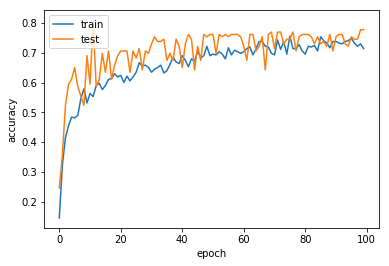

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
# score 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

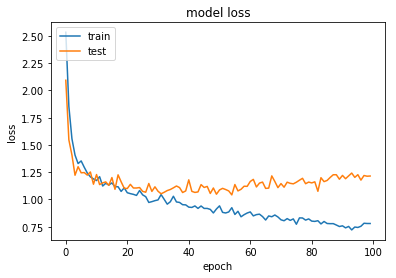

In [48]:
# loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()